In [14]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from generate_global_features_2 import generate_global_features

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [15]:
# Randomly select n species from dataset

n = 5
data_dirs = util.choose_species(n, 'pulse')

for dir in data_dirs:
    print(dir)

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-3/Piprites chloris/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-3/Piprites chloris/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-1/Colaptes campestris/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-1/Attila rufus/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-2/Emberizoides ypiranganus/


In [16]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'mfcc'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'song'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

In [17]:
print(labels_dict)
print(labels)
print(data[:5])

{'Emberizoides Ypiranganus': 3, 'Piprites Chloris': 0, 'Attila Rufus': 2, 'Colaptes Campestris': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


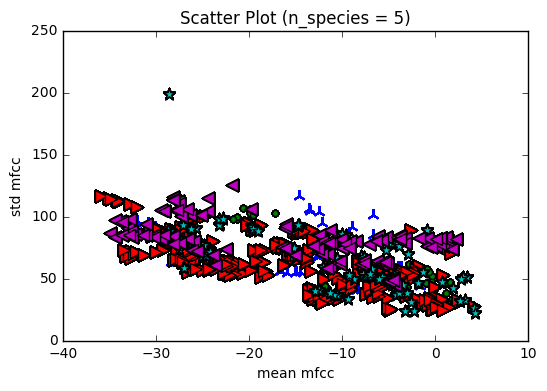

In [13]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean mfcc', 'std mfcc')

## kNN

In [7]:
util.kNN(data, labels, range(3,10), 5)

3-Neighbors | Accuracy: 0.48 (+/- 0.19) | Weight: uniform
3-Neighbors | Accuracy: 0.50 (+/- 0.19) | Weight: distance
4-Neighbors | Accuracy: 0.49 (+/- 0.11) | Weight: uniform
4-Neighbors | Accuracy: 0.50 (+/- 0.19) | Weight: distance
5-Neighbors | Accuracy: 0.46 (+/- 0.13) | Weight: uniform
5-Neighbors | Accuracy: 0.49 (+/- 0.16) | Weight: distance
6-Neighbors | Accuracy: 0.48 (+/- 0.17) | Weight: uniform
6-Neighbors | Accuracy: 0.48 (+/- 0.16) | Weight: distance
7-Neighbors | Accuracy: 0.47 (+/- 0.15) | Weight: uniform
7-Neighbors | Accuracy: 0.49 (+/- 0.14) | Weight: distance
8-Neighbors | Accuracy: 0.46 (+/- 0.13) | Weight: uniform
8-Neighbors | Accuracy: 0.49 (+/- 0.13) | Weight: distance
9-Neighbors | Accuracy: 0.49 (+/- 0.12) | Weight: uniform
9-Neighbors | Accuracy: 0.50 (+/- 0.12) | Weight: distance


## Naïve-Bayes

In [8]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, labels, cv = 5)
print(scores)

[ 0.26865672  0.59090909  0.5         0.20967742  0.37096774]


## SVM

In [9]:
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, data, labels, cv = 5)
print(scores)

[ 0.40298507  0.53030303  0.5625      0.40322581  0.59677419]
